# Field Sweep Example #
Author: Colin Jermain, Minh-Hai Nguyen

Simulating the equilibrium positions of a macrospin as a function of applied field is demonstrated. A `FieldSweep` object is used to preform the simulation.

In [1]:
import sys, importlib
sys.path.append("../")

In [2]:
%matplotlib inline
from matplotlib import pyplot as plt

In [3]:
import numpy as np
import pymacrospin.parameters as params
import pymacrospin.kernels as kernels
# import pymacrospin.numba.kernels as kernels # Run this if want to use numba kernels
import pymacrospin.simulations as sims

### Setting up the kernel and Field Sweep control ###
Unlike the [basic example](Basic Macrospin Example.ipynb), the external field does not need to be defined in the parameters. The values of the externally applied field will be passed to the specify sweeping method of `FieldSweep`.

In [4]:
parameters = {
    'Ms': 140, # Saturation Magnetization (emu/cc)
    'dt': 1e-12, # Timestep (sec)
    'damping': 0.01, # Gilbert damping
    'm0': [1, 0., 0.], # Initial moment (normalized)
}

kernel = kernels.BasicKernel(step_method='RK23', **parameters)

In [5]:
simulation = sims.FieldSweep(kernel)

### Linear field sweep
The units of the start and end fields are defined based on the Parameters object that was chosen initially for the kernel.

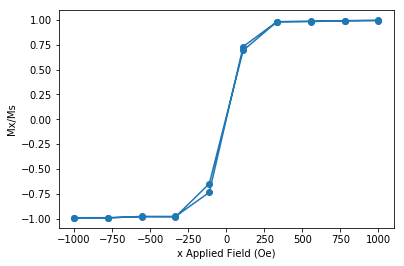

In [6]:
fields, moments, times = simulation.sweep_linear([1e3,100,0],[-1e3,100,0],10,return_time=True)

plt.plot(fields[:,0], moments[:,0], 'o-')
# plt.ylim(-1.1, 1.1)
plt.ylabel("Mx/Ms")
plt.xlabel("x Applied Field (Oe)")
plt.show()

### Rotational field sweep ###
Rotate the field in-plane.

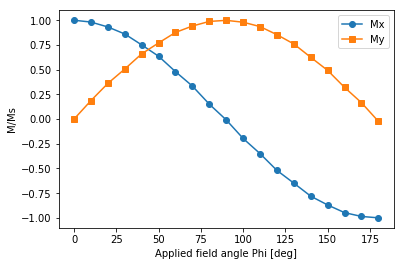

In [16]:
phis = np.linspace(0,180,19)
fields, moments, times = simulation.sweep_rotation(1e3,90,phis,return_time=True)

plt.plot(phis, moments[:,0], 'o-',label="Mx")
plt.plot(phis, moments[:,1], 's-',label="My")
plt.ylim(-1.1, 1.1)
plt.ylabel("M/Ms")
plt.xlabel("Applied field angle Phi [deg]")
plt.legend()
plt.show()